In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [6]:
def create_board():
    board = np.zeros((8,8), dtype=int)
    for i in range(8):
        row = random.randint(0,7)
        board[row][i]=1
    return board

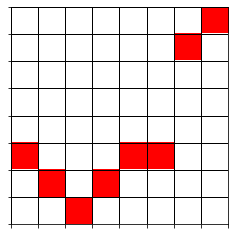

In [19]:
board_example=create_board()
cmap = colors.ListedColormap(['white', 'red'])

# Crear el plot
plt.imshow(board_example, cmap=cmap)
plt.grid(True, which='both', color='black', linewidth=1)
plt.xticks(np.arange(-0.5, len(board_example[0]), 1), [])
plt.yticks(np.arange(-0.5, len(board_example), 1), [])
plt.show()

In [8]:
def fitness(board, flag = False):
    attacking_pairs = 0
    for col in range(8):
        if flag:
            print(f"buscando en columna {col}")
        # Encontrar la fila de la reina en la columna actual
        row = np.where(board[:, col] == 1)[0][0]
        if flag:
            print(f"hay una reina en la fila {row}")
            print("-------------")
        # Verificar ataques en la misma fila
        for other_col in range(col + 1, 8):
            if flag:
                print(f"buscando en la columna {other_col}")
            if board[row][other_col] == 1:
                if flag:
                    print(f" hay una reina atacada en {board[row][other_col]}")
                attacking_pairs += 1
        
        # Verificar ataques en diagonales
        for i in range(1, 8 - col):
            if flag:
                print("buscando en las diagonales:")
            if row - i >= 0 and board[row - i][col + i] == 1:  # Diagonal superior
                if flag:
                    print(f"  hay un ataque en diagonal en {row - i} , {col + i} ")
                attacking_pairs += 1
            if row + i < 8 and board[row + i][col + i] == 1:  # Diagonal inferior
                if flag:
                    print(f"  hay un ataque en diagonal en {row + i} , {col + i}")
                attacking_pairs += 1
        if flag:
            print(f"se acabó la búsqueda en {col} \n")
        
    print(f"hay {attacking_pairs} ataques")
    return attacking_pairs

In [9]:
fitness(board_example, True)

buscando en columna 0
hay una reina en la fila 0
-------------
buscando en la columna 1
buscando en la columna 2
buscando en la columna 3
buscando en la columna 4
 hay una reina atacada en 1
buscando en la columna 5
buscando en la columna 6
buscando en la columna 7
buscando en las diagonales:
  hay un ataque en diagonal en 1 , 1
buscando en las diagonales:
buscando en las diagonales:
buscando en las diagonales:
buscando en las diagonales:
buscando en las diagonales:
  hay un ataque en diagonal en 6 , 6
buscando en las diagonales:
  hay un ataque en diagonal en 7 , 7
se acabó la búsqueda en 0 

buscando en columna 1
hay una reina en la fila 1
-------------
buscando en la columna 2
buscando en la columna 3
buscando en la columna 4
buscando en la columna 5
buscando en la columna 6
buscando en la columna 7
buscando en las diagonales:
buscando en las diagonales:
buscando en las diagonales:
buscando en las diagonales:
buscando en las diagonales:
  hay un ataque en diagonal en 6 , 6
buscando 

9

In [ ]:
def crossover(parent1, parent2):
    child = np.zeros((8, 8), dtype=int)
    child[:, :4] = parent1[:, :4]  # Primeras 4 columnas delprimer padre
    child[:, 4:] = parent2[:, 4:]  # Últimas 4 columnas del segundo padre
    
    # Corregir filas
    for row in range(8):
        queen_count = np.sum(child[row, :])
        if queen_count > 1:
            # Elegir aleatoriamente una reina mantener
            queen_col = random.choice(np.where(child[row, :] == 1)[0])
            # Remover las reinas extras
            for col in range(8):
                if col != queen_col:
                    child[row, col] = 0
    
    # poner reinas en filas vacías
    for row in range(8):
        if np.sum(child[row, :]) == 0:
            # Elegir una columna aleatoria para la nueva reina
            new_queen_col = random.randint(0, 7)
            child[row, new_queen_col] = 1

    return child

parent1 = create_board()
parent2 = create_board()
child = crossover(parent1, parent2)

print("Parent 1:")
print(parent1)
print("\nParent 2:")
print(parent2)
print("\nChild:")
print(child)


In [ ]:
def mutation(board, probability):
    if random.random() < probability:
        # Elegir aleatoriamente una columna para mutar
        col_to_mutate = random.randint(0, 7)
        # Encontrar la fila actual de la reina en esa columna
        current_row = np.where(board[:, col_to_mutate] == 1)[0][0]
        # Elegir una posición  aleatoria para la reina
        new_row = random.randint(0, 7)
        # Mover la reina a la nueva fila
        board[current_row, col_to_mutate] = 0
        board[new_row, col_to_mutate] = 1
    return board


mutated_board = mutation(child.copy(), 0.2)  

print("Original Child:")
print(child)
print("\nMutated Child:")
print(mutated_board)
